# Real Estate Clean up

This is a real dataset, and it was downloaded using web scraping techniques. The data contains registers from **Fotocasa** which is one of the most popular real estate websites in Spain. Please, do not do this (web scraping) unless it is for academic purposes.

The dataset was downloaded a few years ago by Henry Navarro, and in no case were economic returns obtained from it.

It contains thousands of data from real houses published on the web www.fotocasa.com. Your goal is to extract as much information as possible with the knowledge you have so far about data science, for example what is the most expensive house in the entire dataset?

Let's start with precisely that question... Good luck!

#### Exercise 00. Read the dataset assets/real_estate.csv and try to visualize the table (★☆☆)

In [1]:
import pandas as pd
pd.options.mode.copy_on_write = True

# This CSV file contains semicolons instead of comas as separator
ds = pd.read_csv('assets/real_estate.csv', sep=';')
ds

,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,...,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
0,1,153771986,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,103.0,195000,...,0,0,0,0,0,0,"40,2948276786438","-3,44402412135624",NaN,NaN
1,2,153867863,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,NaN,89000,...,0,0,0,0,0,1,"40,28674","-3,79351",NaN,NaN
2,3,153430440,False,look find boadilla,916350408.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,99.0,390000,...,0,0,0,0,0,0,"40,4115646786438","-3,90662252135624",NaN,NaN
3,4,152776331,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,86.0,89000,...,0,0,0,0,0,0,"40,2853785786438","-3,79508142135624",NaN,NaN
4,5,153180188,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,106.0,172000,...,0,0,0,0,0,0,"40,2998774864376","-3,45226301356237",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15330,15331,153901377,False,infocasa consulting,911360461.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,1.0,96.0,259470,...,0,0,0,0,0,0,"40,45416","-3,70286",NaN,NaN
15331,15332,150394373,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,150.0,165000,...,0,0,0,0,0,0,"40,36652","-3,48951",NaN,NaN
15332,15333,153901397,False,tecnocasa torrelodones,912780348.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,4.0,2.0,175.0,495000,...,0,0,0,0,0,0,"40,57444","-3,92124",NaN,NaN
15333,15334,152607440,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,101.0,195000,...,0,0,0,0,0,0,"40,36967","-3,48105",NaN,NaN


In [2]:
# Reviewing / Cleaning the dataset prior starting
ds = ds.drop(['Unnamed: 0'], axis=1)
# ds.set_index('id_realEstates')
print(ds.isna().any())

id_realEstates      False
isNew               False
realEstate_name      True
phone_realEstate     True
url_inmueble        False
rooms                True
bathrooms            True
surface              True
price               False
date                False
description          True
address             False
country             False
level1              False
level2              False
level3              False
level4               True
level5              False
level6               True
level7               True
level8               True
upperLevel          False
countryId           False
level1Id            False
level2Id            False
level3Id            False
level4Id            False
level5Id            False
level6Id            False
level7Id            False
level8Id            False
accuracy            False
latitude            False
longitude           False
zipCode              True
customZone           True
dtype: bool


#### Exercise 01. Which is the most expensive house in the dataset? (★☆☆)

Print the address and the price of the selected house. For example:

`The house with address General Street Nº5 is the most expensive and its price is 5000000 USD`

In [3]:
# DONE
maxprice = ds.loc[ds['price'].idxmax()]

print('The house with address ' + maxprice['address'] + " is the most expensive, and it's price is " + str(maxprice['price']) + ' EUR')

The house with address El Escorial is the most expensive, and it's price is 8500000 EUR


#### Exercise 02. Which is the cheapest house in the dataset? (★☆☆)

Print the address and the price of the selected house. For example:

`The house with address Concrete Street Nº1 is the cheapest and its price is 12000 USD`

In [4]:
# DONE
# I'm assuming that all 0's are a NaN, therefore, I'm using the cheapest that has a price. 
nonzero = ds[ds['price'] != 0]

#Finding the cheapest place
cheapest = nonzero.loc[nonzero['price'].idxmin()]

print('The house with address ' + cheapest['address'] + " is the cheapest, and it's price is " + str(cheapest['price']) + ' EUR')

The house with address Berlin, Coslada is the cheapest, and it's price is 600 EUR


#### Exercise 03. Which is the biggest and the smallest house in the dataset? (★☆☆)

Print both the address and the surface of the selected houses. For example:

`The biggest house is located on Yukka Street Nº10 and its surface is 5000 meters`

`The smallest house is located on County Road 1 N and its surface is 200 meters`

In [5]:
# DONE
# Removing the NaN from the 'surface' column 
clean_surface = ds.dropna(subset=['surface'])

smallest = clean_surface.loc[clean_surface['surface'].idxmin()]
print('The smallest house is located on ' + smallest['address'] +' and its surface is ' + str(smallest['surface']) + ' meters')

biggest = clean_surface.loc[clean_surface['surface'].idxmax()]
print('The biggest house is located on ' + biggest['address'] +' and its surface is ' + str(biggest['surface']) + ' meters')


The smallest house is located on Calle Amparo,  Madrid Capital and its surface is 15.0 meters
The biggest house is located on Sevilla la Nueva and its surface is 249000.0 meters


#### Exercise 04. How many populations (level5 column) the dataset contains? (★☆☆)

Print the names of the populations with a comma as a separator. For example:

`> print(populations)`

`population1, population2, population3, ...`

In [6]:
# DONE
# The population of "Madrid Capital" had a space at the beginning, so I removed it so the list could be in alphabetical order. 
ds['level5'] = ds['level5'].str.strip()
pop_group = ds.groupby('level5').sum().index.to_list()

populations = ''
for pop in pop_group:
    populations += pop + ', '

print(populations)

Ajalvir, Alcalá de Henares, Alcobendas, Alcorcón, Aldea del Fresno, Algete, Alpedrete, Ambite, Anchuelo, Aranjuez, Arganda del Rey, Arroyomolinos (Madrid), Batres, Becerril de la Sierra, Belmonte de Tajo, Boadilla del Monte, Braojos, Brea de Tajo, Brunete, Buitrago del Lozoya, Bustarviejo, Cabanillas de la Sierra, Cadalso de los Vidrios, Camarma de Esteruelas, Campo Real, Canencia, Carabaña, Casarrubuelos, Cenicientos, Cercedilla, Chapinería, Chinchón, Ciempozuelos, Cobeña, Collado Mediano, Collado Villalba, Colmenar Viejo, Colmenar de Oreja, Colmenar del Arroyo, Colmenarejo, Corpa, Coslada, Cubas de la Sagra, Daganzo de Arriba, El Atazar, El Berrueco, El Boalo - Cerceda – Mataelpino, El Escorial, El Molar (Madrid), El Vellón, El Álamo, Estremera, Fresnedillas de la Oliva, Fresno de Torote, Fresno de Torote - Serracines, Fuenlabrada, Fuente El Saz de Jarama, Fuentidueña de Tajo, Galapagar, Garganta de los Montes, Gargantilla del Lozoya, Gascones, Getafe, Griñón, Guadalix de la Sierra, 

#### Exercise 05. Does the dataset contain NAs? (★☆☆)

Print a boolean value (`True` or `False`) followed by the rows/cols that contains NAs.

In [7]:
# DONE
ds.isna().any()

id_realEstates      False
isNew               False
realEstate_name      True
phone_realEstate     True
url_inmueble        False
rooms                True
bathrooms            True
surface              True
price               False
date                False
description          True
address             False
country             False
level1              False
level2              False
level3              False
level4               True
level5              False
level6               True
level7               True
level8               True
upperLevel          False
countryId           False
level1Id            False
level2Id            False
level3Id            False
level4Id            False
level5Id            False
level6Id            False
level7Id            False
level8Id            False
accuracy            False
latitude            False
longitude           False
zipCode              True
customZone           True
dtype: bool

#### Exercise 06. Delete the NAs of the dataset, if applicable (★★☆)

Print a comparison between the dimensions of the original DataFrame versus the DataFrame after the deletions.

In [8]:
# DONE
ds_clean = ds.dropna(axis = 1)

print('The Original DataFrame has a dimension of ' + str(ds.shape) + ', whereas the cleaned one has ' \
    + str(ds_clean.shape) +' after removing columns containing NaN values.')

The Original DataFrame has a dimension of (15335, 36), whereas the cleaned one has (15335, 24) after removing columns containing NaN values.


#### Exercise 07. Which is the mean of prices in the population (level5 column) of "Arroyomolinos (Madrid)"? (★★☆)

Print the obtained value.

In [9]:
# DONE
# I used the DataFrame 'nonzero,' which I created earlier. This will avoid skewing the data to the lower side. 
arroyo = nonzero[nonzero['level5'] == 'Arroyomolinos (Madrid)']
arroyo_meanp = round(arroyo['price'].mean(),2)

print('The average price for "Arroyomolinos (Madrid)" properties is ' + str(arroyo_meanp) + '.')

The average price for "Arroyomolinos (Madrid)" properties is 298905.18.


#### Exercise 08. Plot the histogram of prices for the population (level5 column) of "Arroyomolinos (Madrid)" and explain what you observe (★★☆)

Print the histogram of the prices and write in the Markdown cell a brief analysis about the plot.

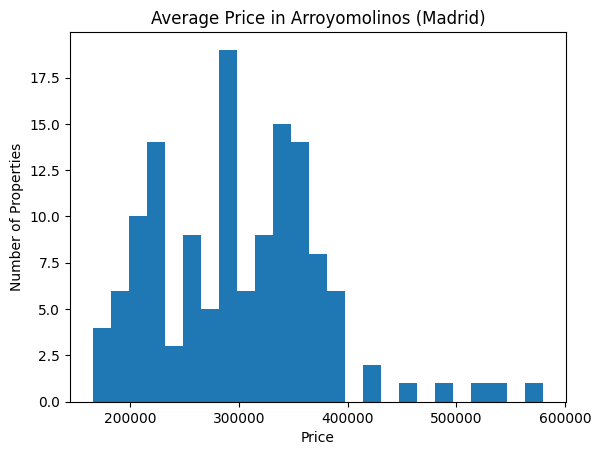

In [10]:
# DONE 
import matplotlib.pyplot as plt 

plt.hist(arroyo['price'], bins=25)
plt.title('Average Price in Arroyomolinos (Madrid)')
plt.xlabel('Price')
plt.ylabel('Number of Properties')
plt.show()

The chart is skewed to the right, with few properties priced over 400,000 EUR. The statistical mode is about 280,000 EUR, with 17 properties listed at that price. 

#### Exercise 09. Are the average prices of "Valdemorillo" and "Galapagar" the same? (★★☆)

Print both average prices and then write a conclusion about them.

In [11]:
#DONE
valde_mp = round(nonzero[nonzero['level5']=='Valdemorillo']['price'].mean(),2)
gala_mp = round(nonzero[nonzero['level5']=='Galapagar']['price'].mean(),2)

print('The average price in Valdermorillo is ' + str(valde_mp) + ' EUR, while Galapagar has an average of ' + str(gala_mp) + \
    ' EUR. Properties in Valdermorillo are ' + str(round(valde_mp - gala_mp,2)) + ' higher on average than the properties in Galapagar.')


The average price in Valdermorillo is 363860.29 EUR, while Galapagar has an average of 360063.2 EUR. Properties in Valdermorillo are 3797.09 higher on average than the properties in Galapagar.


#### Exercise 10. Are the average prices per square meter (price/m2) of "Valdemorillo" and "Galapagar" the same? (★★☆)

Print both average prices and then write a conclusion about it.

Hint: Create a new column called `pps` (price per square meter) and then analyze the values.

In [12]:
# DONE
# Working first on Valdemorillo
valdemorillo = nonzero[nonzero['level5']=='Valdemorillo']
valdemorillo['price sqm'] = round(valdemorillo['price'] / valdemorillo['surface'],2)

# Working on Galapagar
galapagar = nonzero[nonzero['level5']=='Galapagar']
galapagar['price sqm'] = round(galapagar['price'] / galapagar['surface'],2)

# Pricer per square meter in both populations. 
valde_sqmeanp = round(valdemorillo['price sqm'].mean(),2)
gala_sqmeanp = round(galapagar['price sqm'].mean(),2)

print('The avarege price per square meter in Galapagar is ' + str(gala_sqmeanp) + ' while the sqm price in Valdemorillo is ' + \
    str(valde_sqmeanp) + '. This means that houses in Valdemorillo tend to be bigger in size, but the price per sqm in Galapagar' + \
        ' is more expensive.')

# Average surface size per population: 
val_sqm_avg = round(valdemorillo['surface'].mean(),2)
gal_sqm_avg = round(galapagar['surface'].mean(),2)


The avarege price per square meter in Galapagar is 1606.32 while the sqm price in Valdemorillo is 1317.95. This means that houses in Valdemorillo tend to be bigger in size, but the price per sqm in Galapagar is more expensive.


#### Exercise 11. Analyze the relation between the surface and the price of the houses (★★☆)

Hint: You can make a `scatter plot`, then write a conclusion about it.

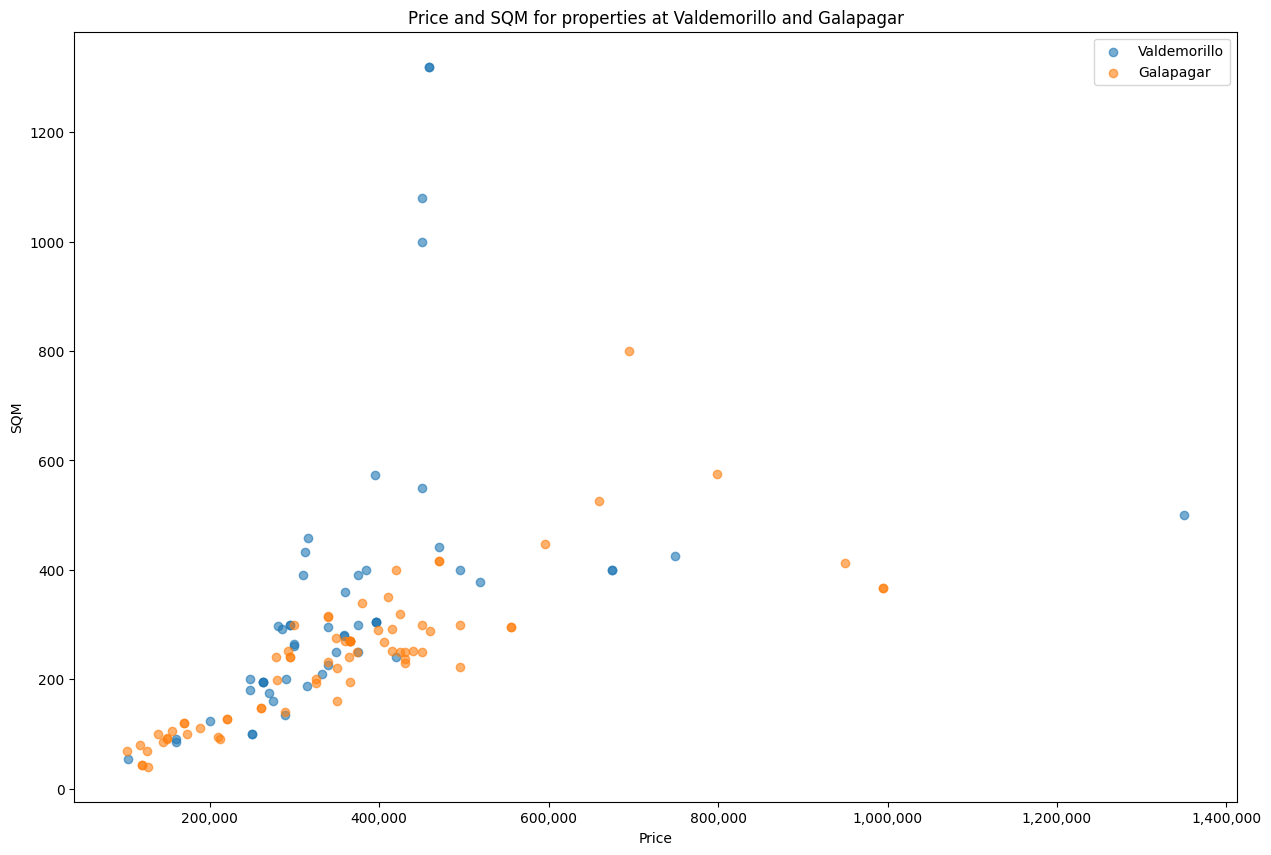

In [13]:
#DONE
import matplotlib.ticker as ticker

# I have removed an outlier so the chart is more representative of its values.  
galapagar2 = galapagar.drop(galapagar[galapagar['id_realEstates'] == 142601805].index)

plt.figure(figsize=(15,10))
plt.scatter(x='price', y='surface', data=valdemorillo, alpha=0.6, label='Valdemorillo')
plt.scatter(x='price', y='surface', data=galapagar2, alpha=0.6, label='Galapagar')
plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.legend(loc="upper right")
plt.title('Price and SQM for properties at Valdemorillo and Galapagar')
plt.xlabel('Price')
plt.ylabel('SQM')
plt.show()

Prices in Galapagar are more consistent on the SQM compared to Valdemorillo. It's easier to identify a trend in price per sqm in Galapagar than in Valdemorillo. Up until 350 sqm, prices in both locations are pretty similar, but once it passes that threshold, the sqm in Valdemorillo tends to lower quite drastically. Comparing both populations, a house with the exact dimensions is, on average, more expensive in Galapagar. 

#### Exercise 12. How many real estate agencies does the dataset contain? (★★☆)

Print the obtained value.

In [14]:
# DONE
realestate = len(ds['realEstate_name'].dropna().unique())

print('There are a total of ' + str(realestate) + ' real estate agencies.')

There are a total of 1821 real estate agencies.


#### Exercise 13. Which is the population (level5 column) that contains the most houses? (★★☆)

Print both the population and the number of houses.

In [15]:
# DONE
pop_most_houses = ds['level5'].value_counts(sort='True').index[0]
print('The population with more houses is ' + pop_most_houses)

The population with more houses is Madrid Capital


#### Exercise 14. Now let's work with the "south belt" of Madrid. Make a subset of the original DataFrame that contains the following populations (level5 column): "Fuenlabrada", "Leganés", "Getafe", "Alcorcón" (★★☆)

Hint: Filter the original DataFrame using the column `level5` and the function `isin`.

In [16]:
# DONE
south_belt = ds[ds['level5'].isin(['Fuenlabrada', 'Leganés', 'Getafe', 'Alcorcón'])].reset_index().drop(columns='index')
south_belt

,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,date,...,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
0,153867863,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,NaN,89000,2019-12-28T18:27:15.9975027Z,...,0,0,0,0,0,1,"40,28674","-3,79351",NaN,NaN
1,152776331,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,86.0,89000,2019-12-28T18:27:15.9975027Z,...,0,0,0,0,0,0,"40,2853785786438","-3,79508142135624",NaN,NaN
2,153152077,False,sinergical inmobiliaria,NaN,https://www.fotocasa.es/es/comprar/vivienda/le...,1.0,1.0,50.0,107000,2019-12-28T18:30:53.960102Z,...,0,0,0,0,0,1,"40,35059","-3,82693",NaN,NaN
3,153995577,False,viviendas365com,911226014.0,https://www.fotocasa.es/es/comprar/vivienda/le...,3.0,2.0,120.0,320000,2019-12-28T18:30:53.960102Z,...,0,0,0,0,0,0,"40,31933","-3,77574",NaN,NaN
4,153586414,False,area uno asesores inmobiliarios,912664081.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,3.0,142.0,425000,2019-12-28T18:32:32.5337942Z,...,0,0,0,0,0,0,"40,3313411","-3,8313868",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,153903887,False,aliseda servicios de gestion inmobiliaria,911368198.0,https://www.fotocasa.es/es/comprar/vivienda/al...,3.0,1.0,78.0,138000,2019-12-17T19:02:00Z,...,0,0,0,0,0,1,"40,31381","-3,83733",NaN,NaN
903,151697757,False,unipiso,912788631.0,https://www.fotocasa.es/es/comprar/vivienda/al...,3.0,2.0,110.0,279000,2019-12-17T18:57:00Z,...,0,0,0,0,0,0,"40,3259051","-3,76318",NaN,NaN
904,153902389,False,jadein ferrero,914871639.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,85.0,170000,2019-12-17T18:43:00Z,...,0,0,0,0,0,0,"40,2882193","-3,8098617",NaN,NaN
905,153871864,False,gestion comercial,911220662.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,91.0,112000,2019-12-17T18:25:00Z,...,0,0,0,0,0,0,"40,28282","-3,78892",NaN,NaN


#### Exercise 15. Make a bar plot of the median of the prices and explain what you observe (you must use the subset obtained in Exercise 14) (★★★)

Print the bar of the median of the prices and write in the Markdown cell a brief analysis about the plot.

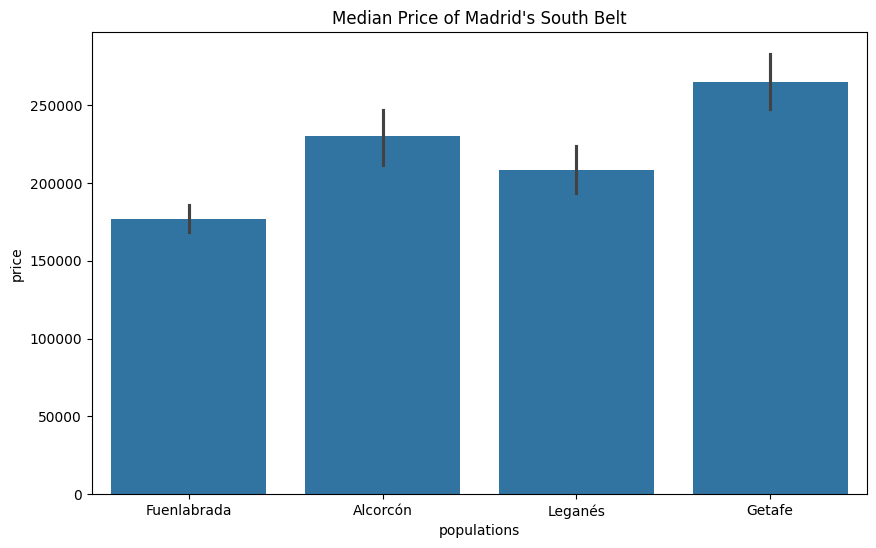

level5
Alcorcón       230071.052632
Fuenlabrada    177198.021459
Getafe         265040.500000
Leganés        208682.010309
Name: price, dtype: float64


In [17]:
#DONE
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(x='level5', y='price', data=south_belt)
plt.title("Median Price of Madrid's South Belt")
plt.xlabel('populations')
plt.show()

sb_meanp = south_belt.groupby('level5')['price'].mean()
print(sb_meanp)

The most expensive population on Madrid's south belt is Getafe, followed by Alcorcón. The cheapest areas to live in are Fuenlabrada and Leganés, where the difference between the most expensive and cheapest is nearly 90K EUR. 

#### Exercise 16. Calculate the sample mean and variance of the variables: price, rooms, surface area and bathrooms (you must use the subset obtained in Exercise 14) (★★★)

Print both values for each variable.

In [18]:
#DONE
mult_mean = south_belt.groupby('level5')[['price', 'rooms', 'surface', 'bathrooms']].agg(['mean', 'var']).round(2)
mult_mean

price               rooms       surface          bathrooms  \
                  mean           var  mean   var    mean      var      mean   
level5                                                                        
Alcorcón     230071.05  1.594783e+10  2.91  0.93  105.91  4244.32      1.62   
Fuenlabrada  177198.02  4.701021e+09  3.03  0.36  103.62  2264.64      1.45   
Getafe       265040.50  2.098267e+10  3.15  0.77  126.90  5828.11      1.87   
Leganés      208682.01  1.191394e+10  2.91  0.82  105.85  3987.48      1.52   

                   
              var  
level5             
Alcorcón     0.59  
Fuenlabrada  0.35  
Getafe       0.66  
Leganés      0.55

#### Exercise 17. What is the most expensive house in each population? You must use the subset obtained in Exercise 14 (★★☆)

Print both the address and the price of the selected house of each population. You can print a DataFrame or a single line for each population.

In [19]:
#DONE

# Get the index of the most expensive houses from the south_belt
maxp_index = south_belt.groupby('level5')['price'].idxmax()

# New DF with only the most expensive houses per population using the previous indexes
m_exp = south_belt.loc[maxp_index]

# Print the required data per population. 
for i in range(len(m_exp)):
    print('The most expensive house in ' + m_exp.iloc[i]['level5'] + ' is at ' + m_exp.iloc[i]['address'] + \
        ', which costs ' + str(m_exp.iloc[i]['price']) + ' EUR.' )

The most expensive house in Alcorcón is at Alcorcón, which costs 950000 EUR.
The most expensive house in Fuenlabrada is at Calle de Paulo Freire, 5, Fuenlabrada, which costs 490000 EUR.
The most expensive house in Getafe is at Getafe, which costs 1050000 EUR.
The most expensive house in Leganés is at Avenida Reina Sofía, Leganés, which costs 650000 EUR.


#### Exercise 18. Normalize the variable of prices for each population and plot the 4 histograms in the same plot (you must use the subset obtained in Exercise 14) (★★★)

For the normalization method, you can use the one you consider; there is not a single correct answer to this question. Print the plot and write in the Markdown cell a brief analysis about the plot.

Hint: You can help yourself by reviewing the *multihist* demo of Matplotlib.

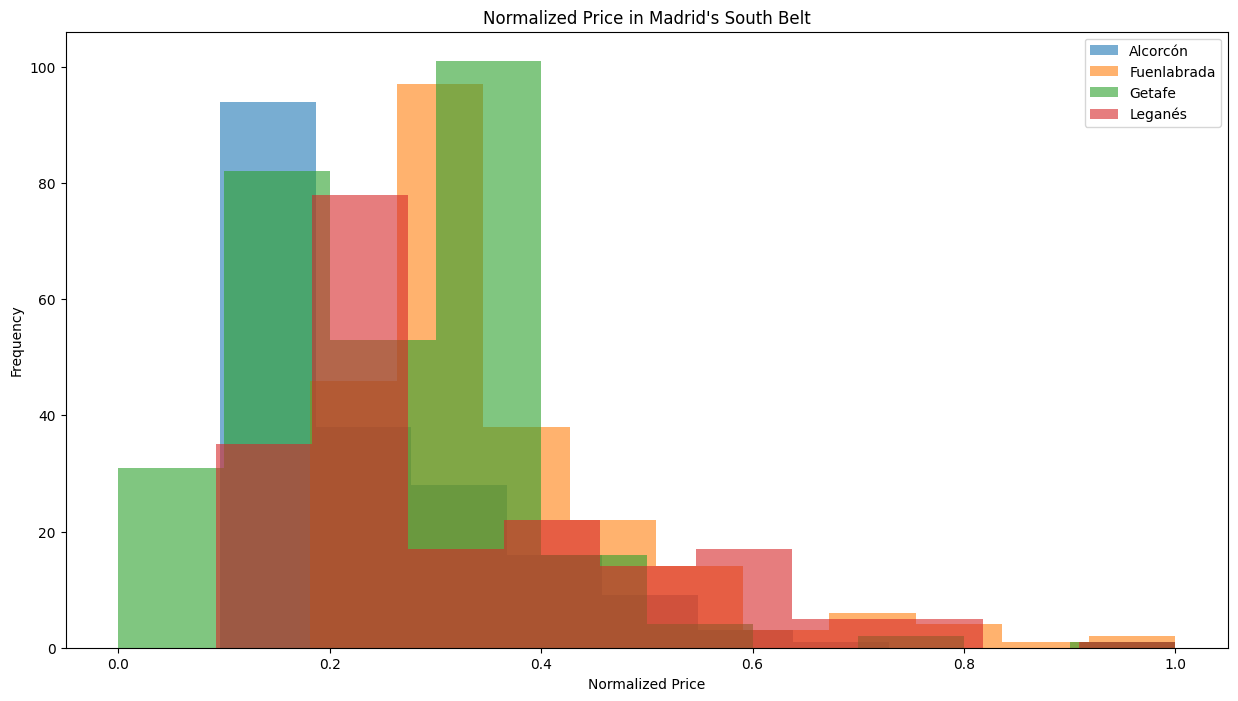

In [20]:
#DONE
# Series with the max price based on level5  
pop_maxp = south_belt.groupby('level5')['price'].transform('max')

# New column to the south belt with the normalized price - 
south_belt['norm price'] = south_belt['price'] / pop_maxp

# Subsets for the populations 
alcorcon = south_belt[south_belt['level5']=='Alcorcón']
fuenlabrada = south_belt[south_belt['level5']=='Fuenlabrada']
getafe = south_belt[south_belt['level5']=='Getafe']
leganes = south_belt[south_belt['level5']=='Leganés']

# Histogram for the populations
plt.figure(figsize=(15,8))
plt.hist(x=alcorcon['norm price'], alpha=0.6, label='Alcorcón')
plt.hist(x=fuenlabrada['norm price'], alpha=0.6, label='Fuenlabrada')
plt.hist(x=getafe['norm price'], alpha=0.6, label='Getafe')
plt.hist(x=leganes['norm price'], alpha=0.6, label='Leganés')
plt.title("Normalized Price in Madrid's South Belt")
plt.xlabel('Normalized Price')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()


**TODO: Markdown**. To write here, double-click on this cell, remove this content and place the text you want to write. Then, execute the cell.

#### Exercise 19. What can you say about the price per square meter (price/m2) between the towns of "Getafe" and "Alcorcón"? You must use the subset obtained in Exercise 14 (★★☆)

Hint: Create a new column called `pps` (price per square meter) and then analyze the values.

In [21]:
#DONE
south_belt['sqm price'] = south_belt['price'] / south_belt['surface']

sb_meanp = south_belt.groupby('level5')['sqm price'].mean().round(2)
print(sb_meanp)

level5
Alcorcón       2239.30
Fuenlabrada    1796.73
Getafe         2066.31
Leganés        2047.50
Name: sqm price, dtype: float64


The price per square meter in Alcorcón is +170 EUR, which is more expensive on average than Getafe. 

#### Exercise 20. Make the same plot for 4 different populations (level5 column) and rearrange them on the same graph. You must use the subset obtained in Exercise 14 (★★☆)
 
Hint: Make a scatter plot of each population using subplots.

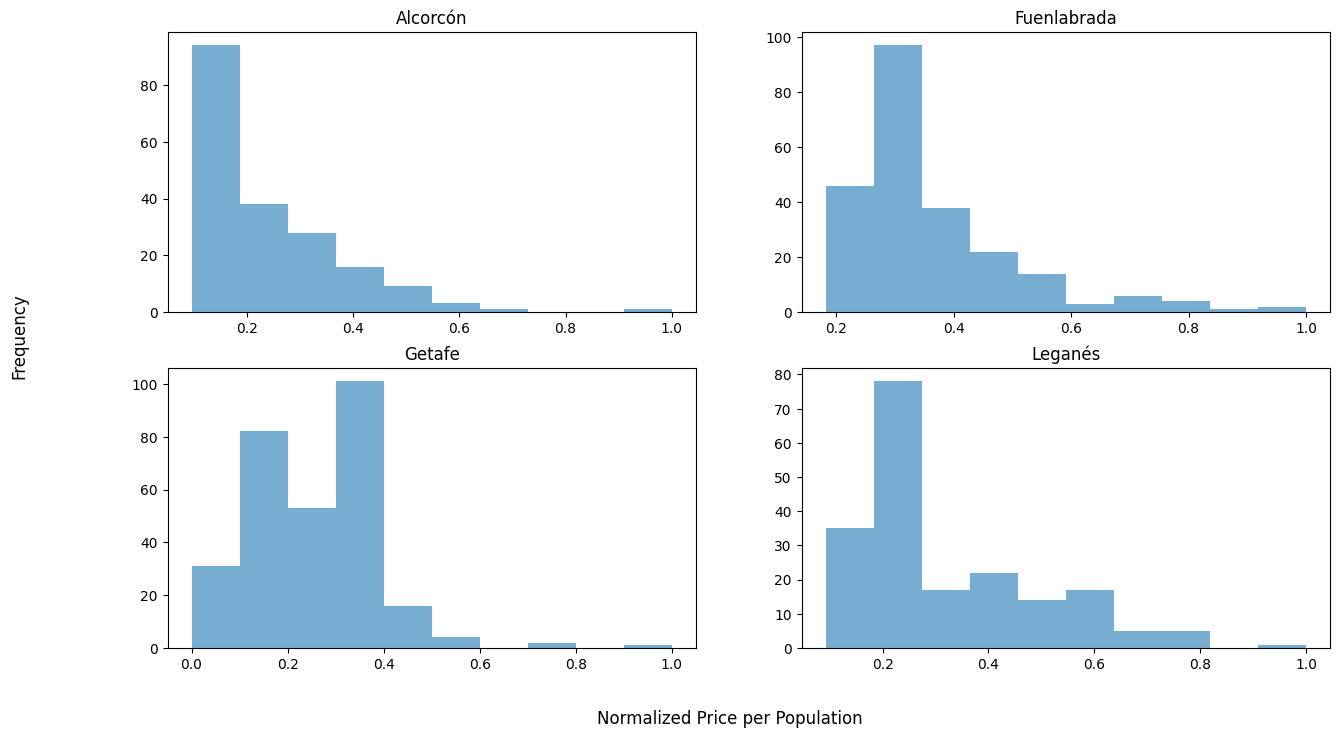

In [22]:
#DONE
fig, axs = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(15, 8)

# Histogram Axis Labels
fig.supxlabel('Normalized Price per Population')
fig.supylabel('Frequency')

# Subsets 
axs[0,0].hist(x=alcorcon['norm price'], alpha=0.6)
axs[0,0].title.set_text('Alcorcón')
axs[0,1].hist(x=fuenlabrada['norm price'], alpha=0.6)
axs[0,1].title.set_text('Fuenlabrada')
axs[1,0].hist(x=getafe['norm price'], alpha=0.6)
axs[1,0].title.set_text('Getafe')
axs[1,1].hist(x=leganes['norm price'], alpha=0.6)
axs[1,1].title.set_text('Leganés')

plt.show()

#### Exercise 21. Make a plot of the coordinates (latitude and longitude columns) of the south belt of Madrid by color of each population (you must use the subset obtained in Exercise 14) (★★★★)

Execute the following cell, and then start coding in the next one. You must implement a simple code that transforms the coordinates columns in a Python dictionary (add more information if needed) and then add it to the map

In [1]:
from ipyleaflet import Map, basemaps, Marker, AwesomeIcon

# Map centered on (60 degrees latitude and -2.2 degrees longitude)
# Latitude, longitude
map = Map(center = (40.4, -3.5), zoom = 9, min_zoom = 1, max_zoom = 20, basemap=basemaps.OpenStreetMap.Mapnik)
map

Map(center=[40.4, -3.5], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out…

In [24]:
# HERE: plot the coordinates of the estates

# PUT HERE YOUR CODE:
llp = south_belt[['latitude', 'longitude', 'level5']]
llp = llp.apply(lambda x: x.str.replace(',', '.'))
pd.to_numeric(llp['latitude'])
pd.to_numeric(llp['longitude'])

coordinates_dict = llp.to_dict('records')

# All the type of icons (just differnt colors)
icon1 = AwesomeIcon(name='fa-address-book', marker_color= 'red', icon_color='black')
icon2 = AwesomeIcon(name='fa-address-book', marker_color= 'blue', icon_color='black')
icon3 = AwesomeIcon(name='fa-address-book', marker_color= 'purple', icon_color='black')
icon4 = AwesomeIcon(name='fa-address-book', marker_color= 'green', icon_color='black')

# Adding markers to the map
for each in coordinates_dict:
    lat = each['latitude']
    lng = each['longitude']
    pop = each['level5']
    if pop == 'Fuenlabrada':
        icon = icon1
    elif pop == 'Alcorcón':
        icon = icon2
    elif pop == 'Getafe':
        icon = icon3
    else:
        icon = icon4
    marker = Marker(icon=icon, location=(lat, lng), draggable=False, opacity=0.75)
    map.add_layer(marker)